In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import ParameterGrid
from sklearn.pipeline import Pipeline
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix, hstack
import itertools
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.multiclass import OneVsRestClassifier
from sklearn import preprocessing
from sklearn.metrics import coverage_error
from sklearn.svm import SVC
from sklearn.metrics import label_ranking_average_precision_score
from sklearn.neural_network import MLPClassifier
import scipy.sparse
from sklearn.metrics import f1_score

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from bs4 import BeautifulSoup

#from sklearn.preprocessing import StandardScaler

from scipy.sparse import coo_matrix, hstack


In [3]:
#Dataset loading
dataset = pd.read_csv('Cleaned_Posts.csv', nrows = None, index_col=0)
dataset.shape

(49415, 10)

In [4]:
#Any np.nan ?
dataset.isnull().sum()

TText             0
TText_NEG         0
PText             0
TCode         10056
PCode          9629
TTitle            0
TTitle_NEG        0
Title             0
PTags             0
Tags              0
dtype: int64

In [5]:
#np.nan cleaning
dataset['TCode'] = dataset['TCode'].fillna('None')
dataset['PCode'] = dataset['PCode'].fillna('None')

In [6]:
#Any np.nan ?
dataset.isnull().sum()

TText         0
TText_NEG     0
PText         0
TCode         0
PCode         0
TTitle        0
TTitle_NEG    0
Title         0
PTags         0
Tags          0
dtype: int64

In [8]:
#Downsampling
dataset = dataset.sample(10000)
dataset.shape

(10000, 10)

In [9]:
dataset.head()

,TText,TText_NEG,PText,TCode,PCode,TTitle,TTitle_NEG,Title,PTags,Tags
Id,,,,,,,,,,
48058644,multiply.j multiple.c,multiply.j multiple.c,Multiply.js Multiple.c,// function definition function myFunction () ...,//function definition\r\nfunction myFunction()...,retriv process cgi request,retriv process cgi request,How to retrive and process CGI request,"['javascript', 'jquery', 'json', 'ajax', 'cgi']",<javascript><jquery><json><ajax><cgi>
48081738,built tensorflow sourc use bazel howev tri run...,built tensorflow sourc use bazel howev tri run...,I have built TensorFlow from source using Baz...,python / home / olu / TensorFlow_Source / tens...,python /home/olu/TensorFlow_Source/tensorflow/...,tensorflow freeze_graph find .runfil,tensorflow freeze_graph find_NEG .runfil_NEG,TensorFlow freeze_graph cannot find .runfiles,"['tensorflow', 'tensorflow-serving']",<tensorflow><tensorflow-serving>
48093909,hello everyon tri fix size select option attri...,hello everyon tri fix size select option attri...,Hello everyone here i am trying to fix the si...,"< div class ="" col - md - col - sm - col - lg ...","<div class=""col-md-12 col-sm-12 col-lg-12 nopa...",fix size option select attribut,fix size option select attribut,How to fix size of option in select attribute,"['javascript', 'angularjs', 'html5', 'css3']",<javascript><angularjs><html5><css3>
48146232,follow question ask befor tri pars array json ...,follow question ask befor tri pars array json ...,This is a follow up to a question that I aske...,"string sJSON =@ ""[ {"" "" dateNumeric """" : ,"" "" ...","string sJSON = @""[{""""dateNumeric"""":1216000000,...",loop json array list,loop json array list,Looping through JSON Array List,"['c#', 'json']",<c#><.net><json>
48060404,wrote simpl code python keep data time file se...,wrote simpl code python keep data time file se...,I wrote some simple code in Python to keep da...,"try : hours = open ("" / home / pi / Projects /...","try:\n hours=open(""/home/pi/Projects/Webio/...",python macro call javascript cut random elemen...,python macro call javascript cut random elemen...,Python macro called by javascript cutting rand...,"['javascript', 'jquery', 'python', 'macros', '...",<javascript><jquery><python><macros><webiopi>


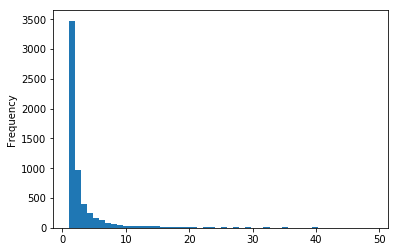

35

In [21]:
#Most commons tags
dataset['PTags'] = dataset['Tags'].apply(lambda x: [tag.name for tag in BeautifulSoup(x, 'html.parser').find_all()])
df = pd.DataFrame(dataset['PTags'].tolist()).stack().value_counts()
df[df<50].plot(kind = 'hist', bins = 50)
plt.show()

popularitytags = df[df>100].to_dict()
len(popularitytags)


In [11]:
#Tags cleaning
textset = dataset.copy()
textset['PTagsCleaned'] = textset['PTags'].apply(lambda x: [tag for tag in x if tag in popularitytags.keys()])
textset['PTagsCleanedLen'] = textset['PTagsCleaned'].apply(lambda x: len(x))
textset = textset[textset['PTagsCleanedLen'] != 0]
textset = textset.dropna()
print(textset.shape)
textset[['PTagsCleaned', 'PTags', 'TCode']].head()

(8520, 12)


,PTagsCleaned,PTags,TCode
Id,,,
48058644,"[javascript, jquery, json, ajax]","[javascript, jquery, json, ajax, cgi]",// function definition function myFunction () ...
48081738,[tensorflow],"[tensorflow, tensorflow-serving]",python / home / olu / TensorFlow_Source / tens...
48093909,"[javascript, angularjs, html5, css3]","[javascript, angularjs, html5, css3]","< div class ="" col - md - col - sm - col - lg ..."
48146232,"[c#, json]","[c#, json]","string sJSON =@ ""[ {"" "" dateNumeric """" : ,"" "" ..."
48060404,"[javascript, jquery, python]","[javascript, jquery, python, macros, webiopi]","try : hours = open ("" / home / pi / Projects /..."


In [ ]:
#Data assembly
X = np.hstack((textlda, titlelda, codelda))
X.shape

In [ ]:
#Label dataset creation

y = textset['PTagsCleaned']

mlb = preprocessing.MultiLabelBinarizer()
Y = mlb.fit_transform(y)
Y.shape

In [ ]:
#Dataset splitting
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0, shuffle = True)

In [ ]:
rmf = RandomForestClassifier(random_state=0, max_depth=15, verbose = 0, n_jobs=3)
ovr = OneVsRestClassifier(rmf,  n_jobs=-2)

In [ ]:
#Gridsearch RMF
parameters = {'estimator__min_samples_split':[2,3,5], 'estimator__min_samples_leaf':[1,2,5], 'estimator__n_estimators':[10,20]}
scorer = make_scorer(label_ranking_average_precision_score)
clfrfm = GridSearchCV(ovr, parameters, verbose = 3, cv = 2, scoring = scorer)
clfrfm.fit(X_train, y_train)

In [ ]:
print(clfrfm.best_params_)
print(clfrfm.best_score_)

In [ ]:
counter = 0
for index, prediction in enumerate(mlb.inverse_transform(clfrfm.predict(X_test))):
    if prediction != ():
        print('Prediction completed :')
        print(prediction)
        print(mlb.inverse_transform(y_test)[index])
        counter += 1
    else:
        print('No Prediction')
        print(mlb.inverse_transform(y_test)[index])
    print()
print('Predicted {}'.format(counter))
print('Empty {}'.format(X_test.shape[0] - counter))

In [ ]:
#Gridsearch SVC
parameters = {'estimator__C':np.logspace(-3, 2, 6), 'estimator__gamma':np.logspace(-3, 2, 3)}
scorer = make_scorer(label_ranking_average_precision_score)
svc = SVC()
clf = GridSearchCV(ovrsvm, parameters, verbose = 3, cv = 2, scoring = scorer)
clf.fit(X_train, y_train)

In [ ]:
print(clf.best_params_)
print(clf.best_score_)

In [ ]:
counter = 0
for index, prediction in enumerate(mlb.inverse_transform(clf.predict(X_test))):
    if prediction != ():
        print('index {} - Prediction completed :'.format(index))
        print(prediction)
        print(mlb.inverse_transform(y_test)[index])
        counter += 1
    else:
        print('index {} - No Prediction'.format(index))
        print(mlb.inverse_transform(y_test)[index])
    print()
print('Predicted {}'.format(counter))
print('Empty {}'.format(X_test.shape[0] - counter))

In [ ]:
#Gridsearch perceptron
perceptron = MLPClassifier(random_state=0, max_iter=300)
ovrpercep = OneVsRestClassifier(perceptron,  n_jobs=-2)
parameters = {'estimator__solver':['sgd', 'adam'], 'estimator__alpha':np.logspace(-3, 2, 6), 'estimator__hidden_layer_sizes':[(50, ),(100, ),(200, ),]}
scorer = make_scorer(label_ranking_average_precision_score)
clfpercep = GridSearchCV(ovrpercep, parameters, verbose = 3, cv = 2, scoring = scorer)
clfpercep.fit(X_train, y_train)

In [ ]:
print(clfpercep.best_params_)
print(clfpercep.best_score_)

In [ ]:
counter = 0
for index, prediction in enumerate(mlb.inverse_transform(clfpercep.predict(X_test))):
    if prediction != ():
        print('index {} - Prediction completed :'.format(index))
        print(prediction)
        print(mlb.inverse_transform(y_test)[index])
        counter += 1
    else:
        print('index {} - No Prediction'.format(index))
        print(mlb.inverse_transform(y_test)[index])
    print()
print('Predicted {}'.format(counter))
print('Empty {}'.format(X_test.shape[0] - counter))

http://scikit-learn.org/stable/modules/multiclass.html#multilabel-classification-format

In [24]:
#X set creation
X = textset[['TText', 'TTitle', 'TCode']]

In [25]:
#Label dataset creation

y = textset['PTagsCleaned']

mlb = preprocessing.MultiLabelBinarizer()
Y = mlb.fit_transform(y)
Y.shape

(8520, 147)

In [26]:
#Dataset splitting
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0, shuffle = True)

In [27]:
#Custom TfIDF creation

class Customtfidf(BaseEstimator, TransformerMixin):

    def __init__(self, text_max_features=None, title_max_features=None, code_max_features=None,
                       text_min_df=1, title_min_df=1, code_min_df=1,
                       text_max_df=1., title_max_df=1., code_max_df=1.,
                       text_ngram_range=(1,1), title_ngram_range=(1,1), code_ngram_range=(1,1), ):
        
        self.text_max_features = text_max_features
        self.title_max_features = title_max_features
        self.code_max_features = code_max_features
        
        self.text_min_df = text_min_df
        self.title_min_df = title_min_df
        self.code_min_df = code_min_df
        
        self.text_max_df = text_max_df
        self.title_max_df = title_max_df
        self.code_max_df = code_max_df
        
        self.text_ngram_range = text_ngram_range
        self.title_ngram_range = title_ngram_range
        self.code_ngram_range = code_ngram_range
    

    def fit(self, X, y=None, **params):
        dftext = X['TText']
        dftitle = X['TTitle']
        dfcode = X['TCode']
        
        #Text preparation
        self.texttfidf = TfidfVectorizer(tokenizer=None, vocabulary=None, max_features=self.text_max_features, min_df=self.text_min_df, max_df=self.text_max_df, ngram_range=self.text_ngram_range)
        self.texttfidf.fit(dftext)
        
        #Title preparation
        self.titletfidf = CountVectorizer(tokenizer=None, vocabulary=None, max_features=self.title_max_features, min_df=self.title_min_df, max_df=self.title_max_df, ngram_range=self.title_ngram_range)
        self.titletfidf.fit(dftitle)

        
        #Code preparation
        self.codetfidf = CountVectorizer(tokenizer=None, vocabulary=None, max_features=self.code_max_features, min_df=self.code_min_df , max_df=self.code_max_df, ngram_range=self.code_ngram_range)
        self.codetfidf.fit(dfcode)
        return self
    
    def transform(self, X, y=None):
        dftext = X['TText']
        dftitle = X['TTitle']
        dfcode = X['TCode']
        
        #Text preparation
        texttfidf = self.texttfidf.transform(dftext)
        
        #Title preparation
        titletfidf = self.titletfidf.transform(dftitle)
    
        #Code preparation
        codetfidf = self.codetfidf.transform(dfcode)
        
        return scipy.sparse.hstack((texttfidf, titletfidf, codetfidf), format='csr')
    


customtfidf = Customtfidf()
#Customtfidf.fit(textset[['TText', 'TTitle', 'TCode']])
#print('Step1 done')
customtfidf.fit_transform(X_train).shape

(5708, 76286)

In [249]:
class Customtclf(BaseEstimator, TransformerMixin):
    def __init__(self, clf, limit=0.1, **kwargs):
        self.clf = clf
        self.clf.set_params(**kwargs)
        self.limit = limit
    
    def fit(self, X, y):
        self.clf.fit(X, y)
        return self
    
    def predict(self, X, y=None):
        probas = self.clf.predict_proba(X)
        lines = []
        for proba in probas:
            newproba = np.where(proba[:,1] >= self.limit , 1, 0)
            #newproba=proba[:,1]
            lines.append(newproba.reshape(-1,1))
        return np.concatenate(lines, axis=1)
        #return probas

customtfidf = Customtfidf()
#XX=customtfidf.fit_transform(X_train)
    
rmf = RandomForestClassifier(random_state=0)
customclf = Customtclf(rmf)
#customclf.fit(XX, y_train)
        
        
    

In [156]:
np.concatenate([a,a,a], axis =0)


array([[1, 2, 3, 4],
       [4, 1, 1, 5],
       [1, 2, 3, 4],
       [4, 1, 1, 5],
       [1, 2, 3, 4],
       [4, 1, 1, 5]])

In [128]:
rmf.classes_

[array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([

In [106]:
a.sum(axis=0)

array([[1, 2, 3, 4],
       [4, 1, 1, 5]])

In [274]:
#Pipeline creation
svm = SVC(random_state=0)

rmf = RandomForestClassifier(random_state=0)
customclf = Customtclf(rmf, limit=0.2)
#ovr = OneVsRestClassifier(svm)
#scorer = make_scorer(coverage_error)

pipe = [('customtfidf', Customtfidf()), 
       ('customclf', customclf)
       ]
kpipeline = Pipeline(pipe)
kpipeline.fit(X_train, y_train)


Pipeline(memory=None,
     steps=[('customtfidf', Customtfidf(code_max_df=1.0, code_max_features=None, code_min_df=1,
      code_ngram_range=(1, 1), text_max_df=1.0, text_max_features=None,
      text_min_df=1, text_ngram_range=(1, 1), title_max_df=1.0,
      title_max_features=None, title_min_df=1, title_ngram_range=(1, 1)))...obs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
      limit=0.2))])

In [275]:
pred = kpipeline.predict(X_test)
mlb.inverse_transform(pred)

[('nginx',),
 ('visual-studio',),
 ('python',),
 ('c', 'c++', 'c++11', 'javascript'),
 ('arrays', 'ios', 'json', 'swift'),
 ('c', 'c#', 'java'),
 ('android', 'html', 'javascript', 'jquery'),
 ('android', 'c#', 'java'),
 ('ajax', 'css', 'html', 'javascript', 'jquery', 'php'),
 ('c++', 'python'),
 ('ajax', 'angularjs', 'html', 'javascript', 'node.js'),
 ('angular', 'css', 'css3', 'html', 'javascript', 'jquery'),
 ('angular', 'css', 'html', 'javascript', 'twitter-bootstrap'),
 ('c', 'c++', 'javascript'),
 ('php', 'string'),
 ('pandas', 'python', 'r'),
 ('javascript', 'node.js'),
 ('java', 'mongodb', 'spring', 'spring-boot'),
 ('ios',),
 ('android', 'javascript', 'node.js', 'sql-server'),
 ('javascript',),
 ('api', 'csv', 'json', 'python'),
 ('css', 'css3', 'html', 'html5', 'javascript'),
 ('android', 'image'),
 ('c++', 'mysql'),
 ('css', 'html', 'javascript'),
 ('arrays', 'javascript', 'php'),
 ('angular', 'reactjs'),
 ('angular', 'angularjs', 'google-chrome', 'html', 'javascript'),
 ('ht

In [276]:
mlb.inverse_transform(y_test)

[('apache', 'nginx', 'ssl'),
 ('c++',),
 ('python',),
 ('c++',),
 ('json', 'swift'),
 ('java',),
 ('javascript',),
 ('hibernate', 'java'),
 ('ajax', 'javascript'),
 ('numpy', 'python', 'tensorflow'),
 ('arrays', 'jquery'),
 ('css', 'html', 'jquery'),
 ('twitter-bootstrap',),
 ('c++',),
 ('powershell',),
 ('dataframe', 'pandas', 'python'),
 ('javascript', 'node.js'),
 ('hibernate', 'mysql', 'spring-boot', 'spring-mvc'),
 ('ios',),
 ('javascript',),
 ('javascript', 'ruby-on-rails'),
 ('python-3.x',),
 ('css', 'html'),
 ('android', 'image'),
 ('c++11', 'java'),
 ('html', 'javascript', 'jquery'),
 ('powershell',),
 ('angular', 'database', 'javascript', 'reactjs', 'typescript'),
 ('angular', 'angular5'),
 ('python',),
 ('javascript',),
 ('c#',),
 ('asp.net-core',),
 ('android',),
 ('mysql', 'php'),
 ('android', 'java'),
 ('ruby',),
 ('templates',),
 ('angular', 'json', 'npm', 'windows'),
 ('sql-server',),
 ('python', 'python-2.7'),
 ('macos',),
 ('matplotlib', 'python', 'python-2.7'),
 ('re

In [30]:
#Gridsearch SVC

#parameters = {'ovr__estimator__C':np.logspace(-3, 2, 6),
#              'ovr__estimator__gamma':np.logspace(-3, 2, 3),
#             }

parameters = {'customtfidf__code_max_features':[10000, 20000,None],
              'customtfidf__text_max_features':[20000,30000, None],
              'customtfidf__title_max_features':[15000,None],
              #'customtfidf__text_min_df':[1,5,10],
              #'customtfidf__title_min_df':[1,5,10],
              #'customtfidf__code_min_df':[1,5,10],
              #'customtfidf__text_max_df':[1.,8.],
              #'customtfidf__title_max_df':[1.,8.],
              #'customtfidf__code_max_df':[1.,8.],
              #'customtfidf__text_ngram_range':[(1,1), (1,2), (1,3)],
              #'customtfidf__title_ngram_range':[(1,1), (1,2), (1,3)],
              #'customtfidf__code_ngram_range':[(1,1), (1,2), (1,3)],
              #'ovr__estimator__C':np.logspace(-3, 2, 2),
              #'ovr__estimator__gamma':np.logspace(-3, 2, 2),
              }

#scorer = make_scorer(label_ranking_average_precision_score)
scorer = make_scorer(f1_score, average='micro')
svc = SVC()
clf = GridSearchCV(kpipeline, parameters, verbose = 3, scoring=scorer)
clf.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] customtfidf__code_max_features=10000, customtfidf__text_max_features=20000, customtfidf__title_max_features=15000 
[CV]  customtfidf__code_max_features=10000, customtfidf__text_max_features=20000, customtfidf__title_max_features=15000, score=0.010960484568791461, total= 2.1min
[CV] customtfidf__code_max_features=10000, customtfidf__text_max_features=20000, customtfidf__title_max_features=15000 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.5min remaining:    0.0s


[CV]  customtfidf__code_max_features=10000, customtfidf__text_max_features=20000, customtfidf__title_max_features=15000, score=0.012277111955568548, total= 2.0min
[CV] customtfidf__code_max_features=10000, customtfidf__text_max_features=20000, customtfidf__title_max_features=15000 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  6.9min remaining:    0.0s


[CV]  customtfidf__code_max_features=10000, customtfidf__text_max_features=20000, customtfidf__title_max_features=15000, score=0.014526438117373622, total= 2.0min
[CV] customtfidf__code_max_features=10000, customtfidf__text_max_features=20000, customtfidf__title_max_features=None 
[CV]  customtfidf__code_max_features=10000, customtfidf__text_max_features=20000, customtfidf__title_max_features=None, score=0.010960484568791461, total= 2.0min
[CV] customtfidf__code_max_features=10000, customtfidf__text_max_features=20000, customtfidf__title_max_features=None 
[CV]  customtfidf__code_max_features=10000, customtfidf__text_max_features=20000, customtfidf__title_max_features=None, score=0.012277111955568548, total= 2.0min
[CV] customtfidf__code_max_features=10000, customtfidf__text_max_features=20000, customtfidf__title_max_features=None 
[CV]  customtfidf__code_max_features=10000, customtfidf__text_max_features=20000, customtfidf__title_max_features=None, score=0.014526438117373622, total= 2

[CV]  customtfidf__code_max_features=20000, customtfidf__text_max_features=None, customtfidf__title_max_features=15000, score=0.013949433304272014, total= 2.1min
[CV] customtfidf__code_max_features=20000, customtfidf__text_max_features=None, customtfidf__title_max_features=None 


KeyboardInterrupt: 

In [ ]:
X_train.shape

In [ ]:
clf.score(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
clf.best_params_